In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 10

# Import keras to build a DL model
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(60000, 784)/255
X_test = X_test.reshape(10000, 784)/255

In [0]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [0]:
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=784))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(10))
model_adam.add(Activation('softmax'))

# Setting optimizer as Adam
from keras.optimizers import  Adam
# (Do!) 請在 compile model_adam 時使用 'Adam' 當作 optimizer
model_adam.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])



In [0]:
'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

In [44]:
print(history_adam.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:
loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('accuracy')
valacc_adam = history_adam.history.get('val_accuracy')
valloss_adam= history_adam.history.get('val_loss')

In [47]:
print(acc_adam)
print(valacc_adam)
print('==================================================')
print(loss_adam)
print(valloss_adam)

[0.93394446, 0.969463, 0.9779074, 0.9821111, 0.98616666, 0.98774076, 0.99031484, 0.99035186, 0.9918148, 0.9932963]
[0.9674999713897705, 0.9769999980926514, 0.9741666913032532, 0.9750000238418579, 0.9760000109672546, 0.9775000214576721, 0.9791666865348816, 0.9778333306312561, 0.9816666841506958, 0.9810000061988831]
[0.21987489082295172, 0.09840286155042877, 0.07008553290848094, 0.05517575730488709, 0.04268848684911198, 0.038521413668572646, 0.03205783551800453, 0.027699839947435998, 0.024931316680744414, 0.020603789699716185]
[0.11173831664025784, 0.08235398774105124, 0.0926758680685986, 0.09046983978057202, 0.10136088542626583, 0.0874384669199347, 0.09388161673446416, 0.09840355642311155, 0.08990073267480411, 0.1117773453527411]


In [0]:
model_sgd = Sequential()
model_sgd.add(Dense(128, input_dim=784))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(256))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(10))
model_sgd.add(Activation('softmax'))

''' Setting optimizer as SGD '''
from keras.optimizers import SGD
sgd = SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)

model_sgd.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])


In [0]:
history_sgd = model_sgd.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            shuffle=True,
                            validation_split=0.1)

In [0]:
loss_sgd= history_sgd.history.get('loss')
acc_sgd = history_sgd.history.get('accuracy')

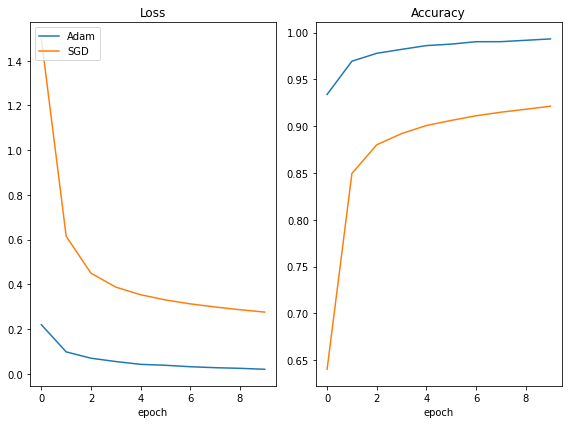

Result saved into 04_optimizerSelection.png


In [52]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_sgd)), loss_sgd,label='SGD')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_sgd)), acc_sgd,label='SGD')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('04_optimizerSelection.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 04_optimizerSelection.png')